In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt 
from matplotlib import style
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.feature_selection import RFE

In [1]:
import pandas as pd

df = pd.read_csv('titanic-passengers.csv',sep=';', encoding="UTF-8")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [3]:
print(pd.isnull(df).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [4]:
total=df.isnull().sum().sort_values(ascending=False)
perc1=df.isnull().sum()/df.isnull().count()*100
perc2=(round(perc1,1)).sort_values(ascending=False)
missing_data=pd.concat([total,perc2], axis=1, keys=['Total','%'])
missing_data.head()

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


In [5]:
df = df.replace({'Survived': {'Yes': 1,'No': 0}})

Text(0.5, 1.0, 'Male')

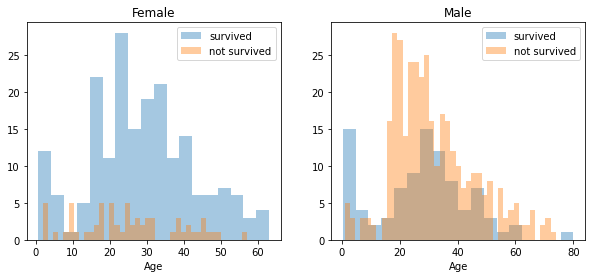

In [7]:
survived='survived'
not_survived='not survived'
fig, axes=plt.subplots(nrows=1, ncols=2,figsize=(10,4))
women=df[df['Sex']=='female']
men=df[df['Sex']=='male']
ax=sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label=survived, ax=axes[0], kde=False)
ax=sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label=not_survived, ax=axes[0], kde=False)
ax.legend()
ax.set_title('Female')
ax=sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label=survived, ax=axes[1], kde=False)
ax=sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label=not_survived, ax=axes[1], kde=False)
ax.legend()
ax.set_title('Male')

C:\Users\uchiha\Anaconda3\envs\nlp\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


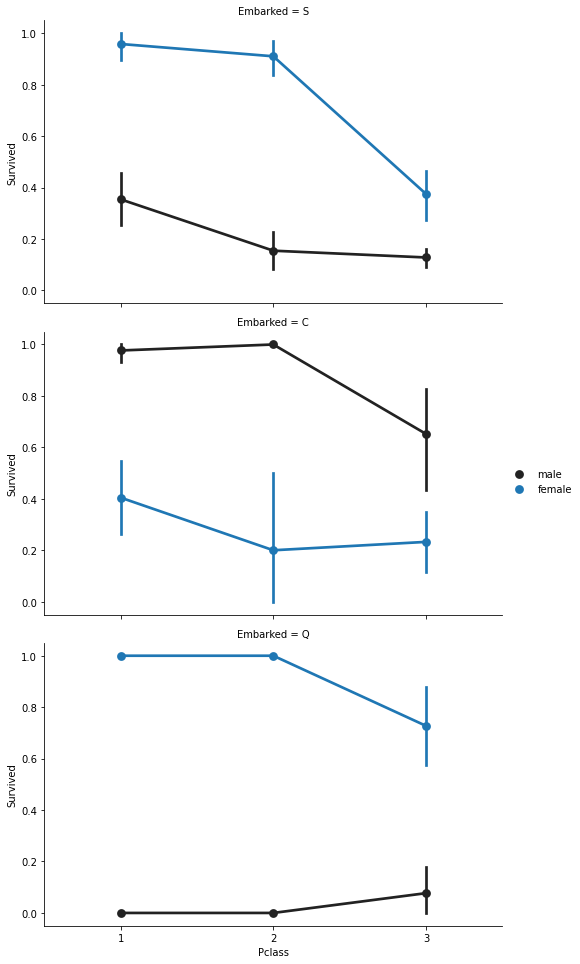

In [8]:
FacetGrid=sns.FacetGrid(df,row='Embarked',size=4.5,aspect=1.6)
FacetGrid.map(sns.pointplot,'Pclass', 'Survived', 'Sex', palette=None, order=None, hue_order=None)
FacetGrid.add_legend()

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

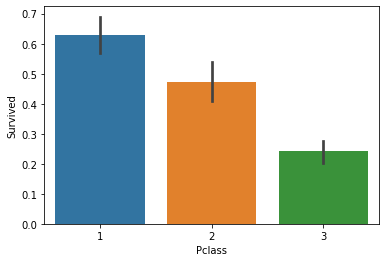

In [9]:
sns.barplot(x='Pclass',y='Survived',data=df)

C:\Users\uchiha\Anaconda3\envs\nlp\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


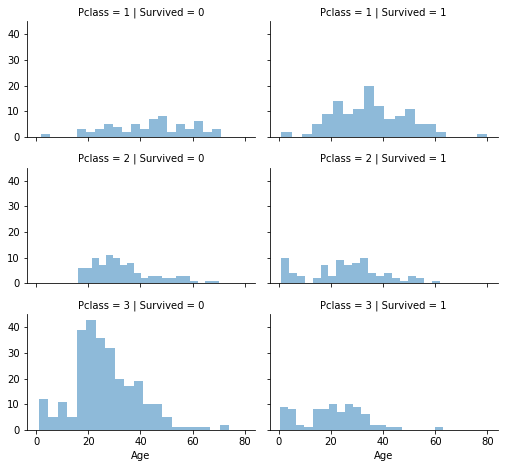

In [10]:
grid = sns.FacetGrid(df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [12]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

"  Fare a une forte corrélation avec Pclass du -0.55 et on n'oublie pas les autres attributs comme Survived,Parch. \n Parch et Sibsp ont une corrélation de 0.41; Age et Pclass ont une corrélation de -0.037 "

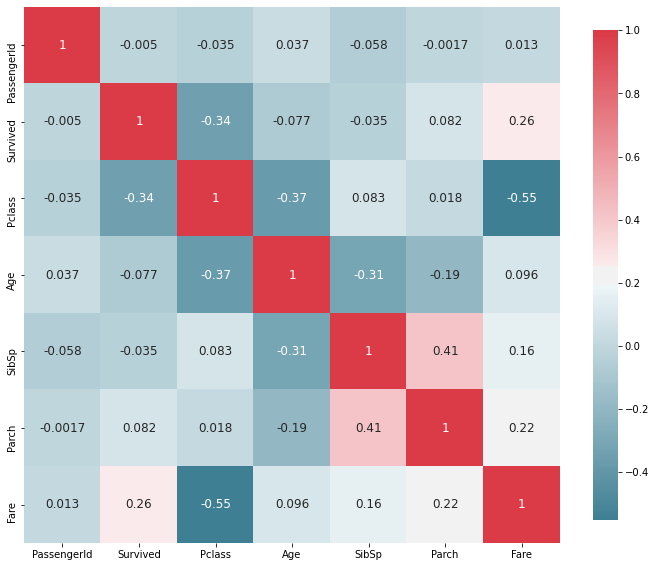

In [13]:
plot_correlation_map( df )
''' Les coefficients de corrélation se situent dans l’intervalle [-1,1].
– si le coefficient est proche de 1 c’est qu’il y a une forte corrélation positive
– si le coefficient est proche de -1 c’est qu’il y a une forte corrélation négative
– si le coefficient est proche de 0 en valeur absolue c’est qu’il y a une faible corrélation '''

'''  Fare a une forte corrélation avec Pclass du -0.55 et on n'oublie pas les autres attributs comme Survived,Parch. 
 Parch et Sibsp ont une corrélation de 0.41; Age et Pclass ont une corrélation de -0.037 '''

In [14]:
df.groupby(['Pclass', 'Survived']).mean()


PassengerId        Age     SibSp     Parch       Fare
Pclass Survived                                                       
1      0          410.300000  43.695312  0.287500  0.300000  64.684008
       1          491.772059  35.368197  0.492647  0.389706  95.608029
2      0          452.123711  33.544444  0.319588  0.144330  19.412328
       1          439.080460  25.901566  0.494253  0.643678  22.055700
3      0          453.580645  26.555556  0.672043  0.384409  13.669364
       1          394.058824  20.646118  0.436975  0.420168  13.694887

In [16]:
df1=df.copy()
df1['Title'] = df1.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [17]:
df1['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Dr', 'Major', 'Don', 'Master', 'Rev', 'Col',
       'Mlle', 'Lady', 'Jonkheer', 'Mme', 'Sir', 'Capt', 'Countess', 'Ms'],
      dtype=object)

In [18]:
df1['Title'] = df1['Title'].replace(['Capt', 'Col','Dr', 'Major', 'Rev'], 'Officier')
df1['Title'] = df1['Title'].replace(['Jonkheer', 'Don','Sir', 'Lady', 'Countess'], 'Royalty')
df1['Title'] = df1['Title'].replace(['Mlle', 'Mme'], 'Miss')
df1['Title'] = df1['Title'].replace(['Ms', 'Mr'], 'Mrs')

In [19]:
df1['Title'].unique()

array(['Mrs', 'Miss', 'Officier', 'Royalty', 'Master'], dtype=object)

C:\Users\uchiha\Anaconda3\envs\nlp\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


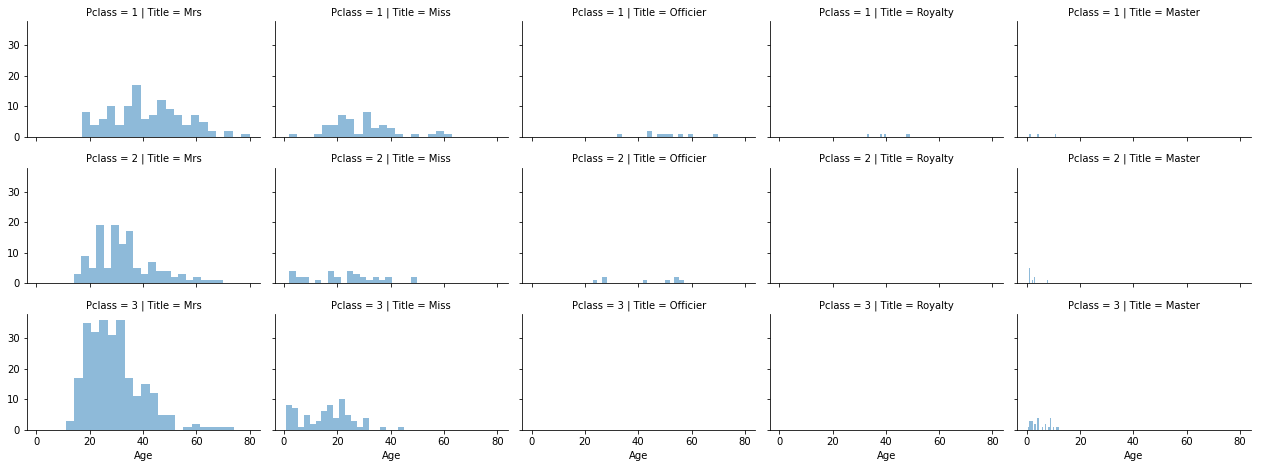

In [20]:
grid = sns.FacetGrid(df1, col='Title', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

<AxesSubplot:xlabel='Title', ylabel='Age'>

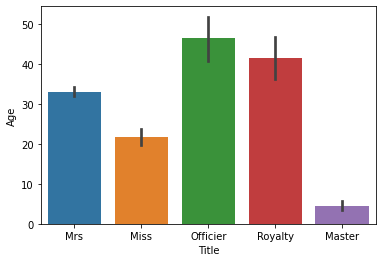

In [21]:
sns.barplot(x='Title',y='Age',data=df1)

In [23]:
df1['FamilySize'] = df1['SibSp'] + df1['Parch'] + 1
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S,Mrs,1
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S,Mrs,1
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S,Mrs,1
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S,Mrs,5
4,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S,Mrs,2


In [24]:
df1["Age"].fillna(df1["Age"].median(skipna=True), inplace=True)
df1["Embarked"].fillna(df1['Embarked'].value_counts().idxmax(), inplace=True)
df1.drop('Cabin', axis=1, inplace=True)
df1
df1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
FamilySize     0
dtype: int64

In [25]:
df1['TravelAlone']=np.where((df1["SibSp"]+df1["Parch"])>0, 0, 1)
df1.drop('SibSp', axis=1, inplace=True)
df1.drop('Parch', axis=1, inplace=True)

In [26]:
df1=pd.get_dummies(df1, columns=["Pclass","Embarked","Sex"])
df1.drop('Sex_female', axis=1, inplace=True)
df1.drop('PassengerId', axis=1, inplace=True)
df1.drop('Name', axis=1, inplace=True)
df1.drop('Ticket', axis=1, inplace=True)
df1.drop('Title', axis=1, inplace=True)

In [30]:
X= df1.iloc[:,1:].values
y = df1.iloc[:,0].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
logreg = LogisticRegression()   #build our logistic model
logreg.fit(X_train, y_train)  #fitting training data
y_pred  = logreg.predict(X_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(X_test, y_test)))

Accuracy=0.82


C:\Users\uchiha\Anaconda3\envs\nlp\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


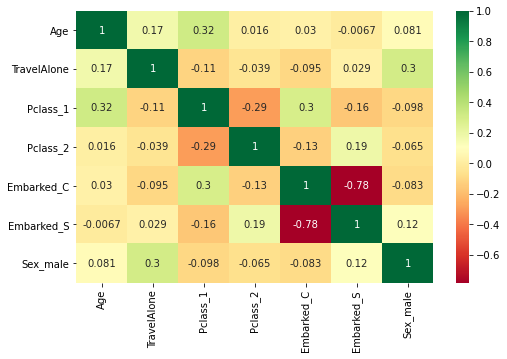

In [32]:
Selected_features = ['Age','TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 
                     'Embarked_S', 'Sex_male']
X = df1[Selected_features]

plt.subplots(figsize=(8, 5))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

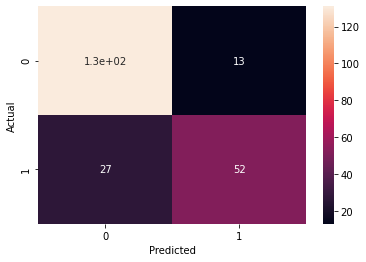

In [33]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

In [ ]:
# check classification scores of logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()